In [2]:
import numpy as np
import matplotlib as plt
#import extinction
#import safe_colours
import requests 
from astropy.io.votable import parse_single_table 
import glob
import os
import urllib
import sys
from astropy.io import fits
from astropy.io.fits import getheader
#import wget
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import aperture_photometry
from photutils import CircularAperture,CircularAnnulus,EllipticalAperture,EllipticalAnnulus,SkyCircularAperture
from photutils import source_properties,SegmentationImage
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import wcs
from astropy import coordinates
from astropy.io import ascii
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from photutils import find_peaks
import os.path
from astropy.table import Table
from photutils import centroid_com, centroid_1dg, centroid_2dg
import warnings
warnings.filterwarnings("ignore")
from astropy.coordinates import Angle
from photutils.aperture import RectangularAperture
from photutils.aperture import RectangularAnnulus
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
norm = ImageNormalize(stretch=SqrtStretch())
from matplotlib.gridspec import GridSpec
from astropy.visualization.wcsaxes import SphericalCircle
import lacosmic
import matplotlib as mpl
def figsize(scale):
    fig_width_pt = 504.0                            # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size
pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 20,               # LaTeX default is 10pt font.
    "font.size": 20,
    "font.weight": 900,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    #ticks 
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "ytick.left": True,    # draw ticks on the left side
    "ytick.right": True,   # draw ticks on the right side
    "xtick.top": True,    # draw ticks on the left side
    "xtick.bottom": True,   # draw ticks on the right side
    "xtick.major.top": True,    # draw x axis top major ticks
    "xtick.minor.top": True,    # draw x axis top major ticks
    "xtick.major.size":    5,     # major tick size in points
    "ytick.major.size":    5,     # major tick size in points
    "xtick.minor.size":    2.9,     # major tick size in points
    #"ytick.minor.size":    2.9,     # major tick size in points
    "xtick.major.width":   0.9,     # major tick width in points
    "ytick.major.width":   0.9,     # major tick width in points
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": r"\usepackage[utf8x]{inputenc} \usepackage[T1]{fontenc}"
    }
mpl.rcParams.update(pgf_with_latex)


In [3]:
path='/Users/kirstytaggart/trilogy/sams/ierg22010_drc.fits' #F815W
path2='/Users/kirstytaggart/trilogy/sams/ierg22020_drc.fits' #F555W

In [4]:
file=get_pkg_data_filename(path)
fits.info(file)

file2=get_pkg_data_filename(path2)
fits.info(file2)

Filename: /Users/kirstytaggart/trilogy/sams/ierg22010_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     877   ()      
  1  SCI           1 ImageHDU        90   (4127, 4391)   float32   
  2  WHT           1 ImageHDU        45   (4127, 4391)   float32   
  3  CTX           1 ImageHDU        40   (4127, 4391)   int32   
  4  HDRTAB        1 BinTableHDU    559   4R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 4A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 19A, 4A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 6A, 9A, 8A, D, D, 4A, 18A, 3A, K, 5A, 3A, D, 10A, 8A, 8A, 23A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, K, K, K, K, D, 3A, K, D, 5A, 7A, D, D, D, D, D, D,

In [5]:
position = SkyCoord(ra=154.1608977*u.degree, dec=73.4005023*u.degree)


In [6]:
img1=fits.open(path)[1]
img2=fits.open(path2)[1]
#img3=fits.open(path)[3]

hdu1=img1.header
hdu2=img2.header
#print('ontime', hdu2['ONTIME'])
#hdu3=img3.header
#print('ontime', hdu3['ONTIME'])

wcs_img1 = WCS(img1.header)
wcs_img2 = WCS(img2.header)
#wcs_img3 = WCS(img3.header)

data1=img1.data
data2=img2.data
#data3=img3.data

cutout_1 = Cutout2D(data1, position, (600, 600), wcs=wcs_img1)
cutout_2 = Cutout2D(data2, position, (600, 600), wcs=wcs_img2)


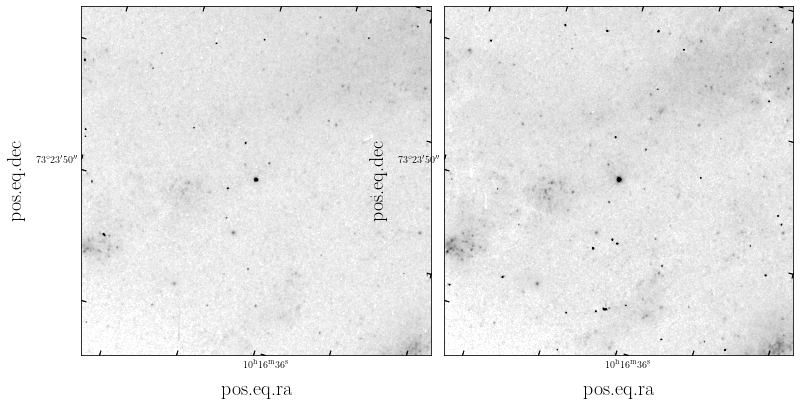

In [7]:
fig = plt.figure(constrained_layout=True,figsize=(15,10),facecolor='white')
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0],projection=cutout_1.wcs)
ax2 = fig.add_subplot(gs[0, 1],projection=cutout_2.wcs)

ax1.imshow(cutout_1.data,cmap='Greys', origin='lower',norm=norm,vmin=0,vmax=0.5)
ax2.imshow(cutout_2.data,cmap='Greys', origin='lower',norm=norm,vmin=0,vmax=0.5)

In [8]:
# Put the cutout image in the FITS HDU
img1.data = cutout_1.data

# Update the FITS header with the cutout WCS
img1.header.update(cutout_1.wcs.to_header())

# Write the cutout to a new FITS file
cutout_filename = 'ncutout1.fits'
img1.writeto(cutout_filename, overwrite=True)



In [9]:
# Put the cutout image in the FITS HDU
img2.data = cutout_2.data

# Update the FITS header with the cutout WCS
img2.header.update(cutout_2.wcs.to_header())

# Write the cutout to a new FITS file
cutout_filename = 'ncutout2.fits'
img2.writeto(cutout_filename, overwrite=True)



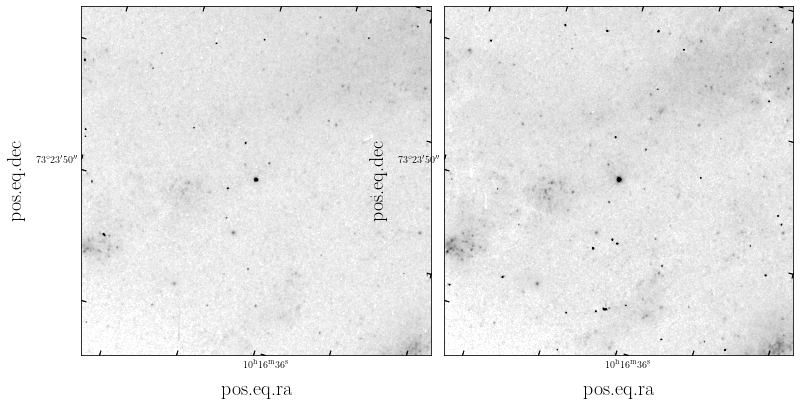

In [10]:
fig = plt.figure(constrained_layout=True,figsize=(15,10),facecolor='white')
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0],projection=cutout_1.wcs)
ax2 = fig.add_subplot(gs[0, 1],projection=cutout_2.wcs)

ax1.imshow(cutout_1.data,cmap='Greys', origin='lower',norm=norm,vmin=0,vmax=0.5)
ax2.imshow(cutout_2.data,cmap='Greys', origin='lower',norm=norm,vmin=0,vmax=0.5)